## Forecasting Stock Prices with LSTM Model (Long-Short Term Memory)
- the following LSTM Data Science project draws inspiration from the following literature review and uplevel's mini datascience project
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0227222
- https://dataprojects.uplevel.work

### 4. Forecasting using ARIMA

The traditional ARIMA model is composed of 3 parameters
- AR component (Auto regressive process): predicting future values based on its own past values, regressing on itself.
- I component (Integrated process)
- MA component (Moving average process)

ARIMA models three aspects of a time series
- Seasonality: Seasonal patterns in the time series (e.g. increase influx of tourists during the christmas holidays)
- Trend: Upward/downward movement of data with time over a large period of time (e.g. house value appreciation)
- White noise: How much random variability is in the data (spikes and troughs at random intervals)

Idea conditions for forecasting using ARIMA:
- Time series is stationary - meaning without seasonality and trend

### Importing necessary libraries

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

# suppress arima depreciated warnings
import warnings
warnings.filterwarnings('ignore')

# plot style
plt.style.use('ggplot')
# plot title size
plt.rc('axes', titlesize=18)
# plot font size
plt.rc('font', size=13)
# plot figure size
matplotlib.rcParams['figure.figsize'] = (18, 9)

### 4.1. ARIMA

Fitting 'Open' data into ARIMA model rather than difference data since ARIMA model will account for the 1st Order differencing already, splitting into test and train data
- Train: 3 Jan 2000 to 16 May 2019
- Test: 17 May 2019 to 1 July 2019

In [2]:
# getting s&p500 data
snp500 = yf.download(tickers=['^GSPC'], start='2000-01-03', end='2019-07-01')

# backfilling s&p data with non-trading days
snp500_backfilled = snp500.asfreq(freq='1D', method='backfill')

[*********************100%***********************]  1 of 1 completed


### Splitting into training and testing set

In [3]:
open_data = snp500_backfilled.Open.to_frame().reset_index()

train = open_data.query('Date >= "2000-01-03" & Date <= "2019-05-16"')
# set index to date for fitting into ARIMA model
train = train.set_index(keys=['Date'])

test = open_data.loc[(open_data['Date'] >= '2019-05-17') & (open_data['Date'] <= '2019-07-01')]
test = test.set_index(keys='Date')

test.head()

,Open
Date,
2019-05-17,2858.600098
2019-05-18,2841.939941
2019-05-19,2841.939941
2019-05-20,2841.939941
2019-05-21,2854.020020


From the previous analysis, a likely combination for the ARIMA model can be:
- p = 2
- d = 1
- q = 2 

### Training ARIMA model

In [41]:
# declaring an ARIMA model object, with p=2, d=1, q=2
train_arima = ARIMA(train, order=(2,1,2), freq='D')

# fitting our training data to the model
train_fit = train_arima.fit()

### Extracting Forecast

In [42]:
# calling the forecast 
train_forecast = train_fit.forecast(len(test))

# forecast returns 3 components - forecasted values, std error and confidence interval
train_forecast[0]

array([2854.40744295, 2854.84976879, 2855.60327979, 2855.03269339,
       2855.80943694, 2855.74714174, 2855.93133604, 2856.27713919,
       2856.30829854, 2856.61333704, 2856.77183665, 2856.95302276,
       2857.18568124, 2857.34759872, 2857.56309929, 2857.75477859,
       2857.94536137, 2858.14977352, 2858.33897655, 2858.53824098,
       2858.73404934, 2858.92849087, 2859.12631761, 2859.32100137,
       2859.51748588, 2859.71357407, 2859.90916393, 2860.10553196,
       2860.30127472, 2860.49732043, 2860.69335042, 2860.88923841,
       2861.08529681, 2861.28123564, 2861.477221  , 2861.67321637,
       2861.86917574, 2862.06517093, 2862.26114423, 2862.45712361,
       2862.65310761, 2862.84908312, 2863.04506588])

<AxesSubplot:xlabel='Date'>

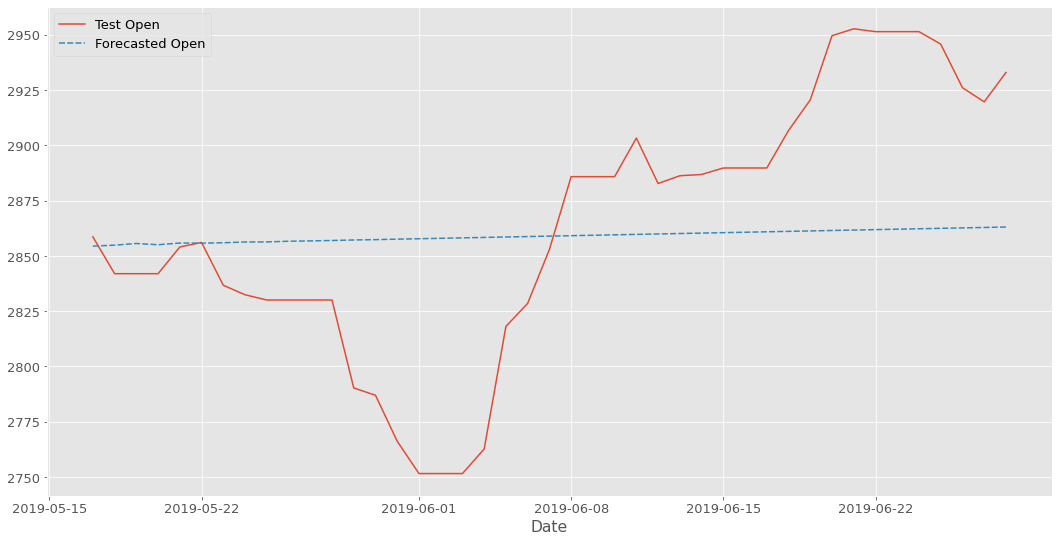

In [43]:
# forecasted values into a dataframe
forecasted = pd.DataFrame(train_forecast[0]).rename(columns={0: 'forecast'})

# merge with test data to visualize
merged = (
    pd
    .concat([test.reset_index(), forecasted], axis=1, ignore_index=True)
    .rename(columns={0: 'Date', 1: 'Test Open', 2: 'Forecasted Open'})
    .set_index('Date')
)

# sns.lineplot()
sns.lineplot(data=merged)

Forecasted values ended up being a straight line because the data does not have strong seasonality. On the bright side, this was a good practice for modelling with ARIMA.